### 제2절. 머신러닝 분석 프로세스
1. 데이터 확인: 연속형/범주형/회귀/분류/비지도
2. 데이터 분할: 학습/검증/평가세트/교차검증방법
3. 전처리: 정규화/표준화/결측치 및 이상치 처리
4. 모델학습: 회귀/분류/비지도 하이퍼파라미터 조절
5. 성능평가: 분석 정확도 확인/알고리즘 성능 제시

### 제3절. 성능평가 기법

#### 1. 회귀분석

In [48]:
y_test = [1, 2, 3]
y_pred = [1.5, 2.5, 3.5]

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# RMSE
import numpy as np
rmse = np.sqrt(mse)
print("RMSE: ", mse)

# MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print("MSLE: ", msle)

# MAPE 
def MAPE(y_test, y_pred):
    mape = np.mean(np.abs((y_test-y_pred)/y_test)) * 100
    return mape

mape = MAPE(np.array(y_test), np.array(y_pred))
print("MAPE: ", mape)

# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)
# 

MAE:  0.5
MSE:  0.25
RMSE:  0.25
MSLE:  0.029142773357585403
MAPE:  30.555555555555554
R-squared:  0.625


#### 2. 분류분석

Accuracy:  0.3333333333333333
Confusion matrix: 
 [[0 1]
 [1 1]]
Precision:  0.5
Recall:  0.5
F1-score:  0.5
AUC:  0.25


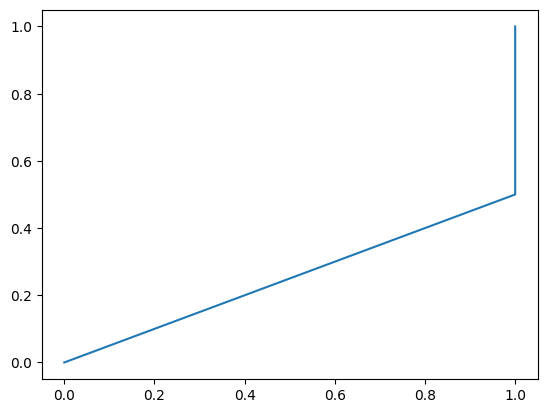

In [49]:
y_test = [1, 1, 0]
y_pred = [1, 0, 1]

# accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)

# precision & recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(np.array(y_test), np.array(y_pred))
recall = recall_score(y_test, y_pred)
print("Precision: ", precision)
print("Recall: ", recall)

# f1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-score: ", f1)

# roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thres = roc_curve(y_test, y_pred, pos_label=1)
plt.plot(fpr, tpr)
auc = auc(fpr, tpr)
print("AUC: ", auc)

### 제4절. 머신러닝 분석과정 빠르게 맛보기 - 회귀분석

#### 1. 데이터 확인

In [50]:
from sklearn import datasets
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


df, price = datasets.fetch_openml('boston', return_X_y=True)
df['PRICE'] = price

In [51]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [52]:
print(df.shape, '\n')
print(df.info())

(506, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None


In [53]:
df['RAD'] = df['RAD'].astype(int)

In [54]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

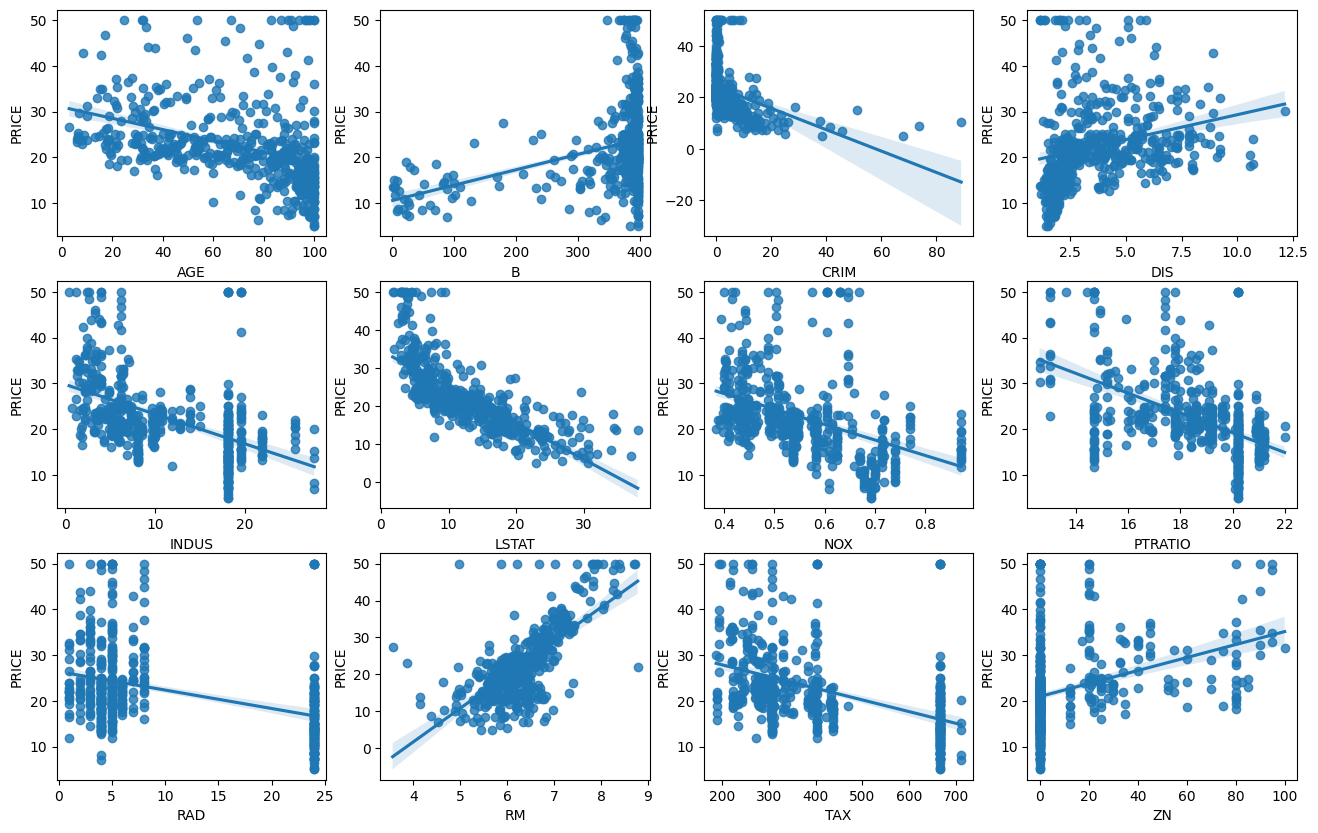

In [55]:
# 산점도 그리기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 10), ncols=4, nrows=3, 
                        constrained_layout=False)
features = df.columns.difference(['PRICE', 'CHAS'])
for i, feature in zip(range(12), features) :
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y=df['PRICE'], data=df, ax=axs[row][col])

#### 2. 데이터 분할

In [56]:
from sklearn.model_selection import train_test_split
x = df[df.columns.difference(['CHAS', 'PRICE'])].values
y = df['PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print('학습데이터셋 price 평균: ', y_train.mean())
print('평가데이터셋 price 평균: ', y_test.mean())

학습데이터셋 price 평균:  22.796534653465343
평가데이터셋 price 평균:  21.488235294117644


#### 3. 전처리

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### 4. 모델학습

In [58]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

pred_train = linear.predict(X_train_scaled)
mae = mean_absolute_error(y_train, pred_train)
mse = mean_squared_error(y_train, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, pred_train)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.32616
MSE:  22.11246
RMSE:  4.70239
R2:  0.74546


#### 5. 성능평가 및 예측값 저장

In [63]:
X_test_scaled = scaler.transform(X_test)
pred_test = linear.predict(X_test_scaled)

mae = mean_absolute_error(y_test, pred_test)
mse = mean_squared_error(y_test, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_test)

print('MAE: {0: .5f}'.format(mae))
print('MSE: {0: .5f}'.format(mse))
print('RMSE: {0: .5f}'.format(rmse))
print('R2: {0: .5f}'.format(r2))

MAE:  3.23724
MSE:  24.63539
RMSE:  4.96341
R2:  0.66406


In [66]:
pred_df = pd.DataFrame(pred_test, columns = ['pred_price'])
actual_df = pd.DataFrame(y_test, columns =['actual_price'])
reg_result = pd.concat([actual_df, pred_df], axis=1)
reg_result.head()

,actual_price,pred_price
0,23.6,29.218660
1,32.4,33.551467
2,13.6,14.810658
3,22.8,25.084725
4,16.1,19.173927


### 제5절. 머신러닝 분서과정 빠르게 맛보기 - 분류분석

#### 1. 데이터 확인

In [70]:
from sklearn.datasets import load_iris
import pandas as pd

iris_temp = load_iris()

iris = pd.DataFrame(iris_temp.data, columns = iris_temp.feature_names)
iris['species'] = iris_temp.target

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### 2. 데이터 분할

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris[iris.columns.difference(['species'])], 
                                                    iris['species'], 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=iris['species'])

#### 3. 전처리

In [79]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

#### 4. 모델학습

In [81]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf_5 = DecisionTreeClassifier(max_depth=5, random_state=100)
dtree_clf_3 = DecisionTreeClassifier(max_depth=3, random_state=100)
dtree_clf_1 = DecisionTreeClassifier(max_depth=1, random_state=100)

from sklearn.model_selection import cross_val_score
import numpy as np
scores = cross_val_score(dtree_clf_5, X_train, y_train, 
                         scoring='accuracy', cv=10)
print("교차검증 정확도: ", np.round(scores, 3))  # 10개의 정확도
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.833 1.    0.917 1.    1.    0.833 1.    1.    1.    0.833]
평균 검증 정확도:  0.9417


In [82]:
scores = cross_val_score(dtree_clf_3, X_train, y_train, 
                         scoring='accuracy', cv=10)
print("교차검증 정확도: ", np.round(scores, 3))  # 10개의 정확도
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.917 1.    0.917 0.917 1.    0.833 1.    0.917 0.917 0.833]
평균 검증 정확도:  0.925


In [83]:
scores = cross_val_score(dtree_clf_1, X_train, y_train, 
                         scoring='accuracy', cv=10)
print("교차검증 정확도: ", np.round(scores, 3))  # 10개의 정확도
print("평균 검증 정확도: ", np.round(np.mean(scores), 4))

교차검증 정확도:  [0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667 0.667]
평균 검증 정확도:  0.6667


#### 5. 성능평가 및 예측값 저장

In [102]:
dtree_clf_5.fit(X_train, y_train)
pred = dtree_clf_5.predict(X_test)  # pandas.series 

from sklearn.metrics import accuracy_score
print("의사결정나무(교차검증 후) 예측 정확도: {0: .5f}".format(\
    accuracy_score(y_test, pred)))

의사결정나무(교차검증 후) 예측 정확도:  0.96667


In [105]:
np.array(y_test)

array([0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 0, 1, 1, 2, 0, 0])

In [104]:
type(pred)

numpy.ndarray

In [108]:
pred = pd.DataFrame(pred, columns = ['pred species'])
pred.head()

,pred species
0,0
1,1
2,0
3,2
4,0


In [109]:
actual = pd.DataFrame(np.array(y_test), columns = ['actual species'])
actual.head()

,actual species
0,0
1,1
2,0
3,2
4,0


In [110]:
classify_result = pd.concat([actual, pred], axis=1)
classify_result.head()

,actual species,pred species
0,0,0
1,1,1
2,0,0
3,2,2
4,0,0
